In [ ]:
# Didem Uysal 
# 6784594

In [2]:
import pandas as pd

In [3]:
ecoli = pd.read_csv("ecoli.csv") # read the csv file 
print(ecoli)  # class values: 0 membrane, 1 perisplasm

           X1        X2        X3        X4        X5  C
0   -0.007564  0.222171  0.158978  1.159728  0.267387  0
1    0.171858 -0.041690  0.250635  0.165851  0.461043  0
2    0.736046  0.343963  0.749114  0.561858  0.712554  0
3    0.000639 -0.175082  0.070584  0.317284  0.582597  0
4    0.571760 -0.244216  0.234515  0.902095  0.594026  0
..        ...       ...       ...       ...       ... ..
124  0.648946  0.946382  0.893618  0.539939  0.532365  1
125  0.768015  0.955685  0.495043  0.100583  0.836665  1
126  0.649908  0.845137  0.406619  0.654427  1.003261  1
127  0.221111  0.787071  0.318218  0.867372  0.682562  1
128  0.423381  1.089316  1.486272  0.250884  0.440059  1

[129 rows x 6 columns]


In [11]:
# Exploratory data analysis - first look
ecoli.shape 
ecolu.head()

,X1,X2,X3,X4,X5,C
0,-0.007564,0.222171,0.158978,1.159728,0.267387,0
1,0.171858,-0.041690,0.250635,0.165851,0.461043,0
2,0.736046,0.343963,0.749114,0.561858,0.712554,0
3,0.000639,-0.175082,0.070584,0.317284,0.582597,0
4,0.571760,-0.244216,0.234515,0.902095,0.594026,0


In [15]:
# null check for corresponding protein values
missing_values = ecoli.isnull().sum()
print("Missing Values:")
print(missing_values) # it is seen that the dataset is a whole

Missing Values:
X1    0
X2    0
X3    0
X4    0
X5    0
C     0
dtype: int64


In [97]:
numeric = [var for var in ecoli.columns if ecoli[var].dtype!='O'] # checkin the dataset consisted of numeric values
print('The numerical variables are :', numeric)

The numerical variables are : ['X1', 'X2', 'X3', 'X4', 'X5', 'C']


In [109]:
# import of required libraries
from sklearn.preprocessing import scale  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


In [99]:
# Split the data into feature matrix X and target variable y
X = ecoli[['X1', 'X2', 'X3', 'X4', 'X5']]
y = ecoli['C']

In [100]:
# Scale the feature matrix X for model. Scaling makes mean=0 and standard deviation=1
X_scaled = scale(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape  


((103, 5), (26, 5))

In [107]:
# Train the Naive Bayes model
model_gnb = GaussianNB()    
model_gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = model_gnb.predict(X_test)   # give the MAP estimate of the class label


In [110]:
#Logistic Regression model
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = model_logreg.predict(X_test)

In [127]:
# Calculate Evaluation metrics for Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print(classification_report(y_test, y_pred_gnb))

print("Accuracy For Naive Bayes:", accuracy_gnb)
print("Precision For Naive Bayes:", precision_gnb)
print("Recall For Naive Bayes:", recall_gnb)
print("F1 Score For Naive Bayes:", f1_gnb)

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.60      0.27      0.37        11

    accuracy                           0.62        26
   macro avg       0.61      0.57      0.55        26
weighted avg       0.61      0.62      0.58        26

Accuracy For Naive Bayes: 0.6153846153846154
Precision For Naive Bayes: 0.6
Recall For Naive Bayes: 0.2727272727272727
F1 Score For Naive Bayes: 0.37499999999999994


In [126]:
# Calculate Evaluation metrics for Logistic Regression 
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(classification_report(y_test, y_pred_logreg))

print("Accuracy For Logistic Regression :", accuracy_logreg)
print("Precision For Logistic Regression:", precision_logreg)
print("Recall For Logistic Regression:", recall_logreg)
print("F1 Score For Logistic Regression:", f1_logreg)

              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.71      0.45      0.56        11

    accuracy                           0.69        26
   macro avg       0.70      0.66      0.66        26
weighted avg       0.70      0.69      0.68        26

Accuracy For Logistic Regression : 0.6923076923076923
Precision For Logistic Regression: 0.7142857142857143
Recall For Logistic Regression: 0.45454545454545453
F1 Score For Logistic Regression: 0.5555555555555556


In [132]:
# Confusion Matrix for Gaussian Naive Bayes
conf_m_gnb = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix for Naive Bayes\n\n', conf_m_gnb)
print('\nTrue Positives(TP) = ', conf_m_gnb[0,0])
print('\nTrue Negatives(TN) = ', conf_m_gnb[1,1])
print('\nFalse Positives(FP) = ', conf_m_gnb[0,1])
print('\nFalse Negatives(FN) = ', conf_m_gnb[1,0])

Confusion matrix for Naive Bayes

 [[13  2]
 [ 8  3]]

True Positives(TP) =  13

True Negatives(TN) =  3

False Positives(FP) =  2

False Negatives(FN) =  8


In [131]:
# Confusion Matrix for Logistic Regression 
conf_m_logreg = confusion_matrix(y_test, y_pred_logreg)

print('Confusion matrix for Logistic Regression  \n\n', conf_m_logreg)
print('\nTrue Positives(TP) = ', conf_m_logreg[0,0])
print('\nTrue Negatives(TN) = ', conf_m_logreg[1,1])
print('\nFalse Positives(FP) = ', conf_m_logreg[0,1])
print('\nFalse Negatives(FN) = ', conf_m_logreg[1,0])

Confusion matrix for Logistic Regression  

 [[13  2]
 [ 6  5]]

True Positives(TP) =  13

True Negatives(TN) =  5

False Positives(FP) =  2

False Negatives(FN) =  6


In [157]:
# Perform cross-validation
cv_scores_gnb = cross_val_score(model_gnb, X_train, y_train, cv=2, scoring='accuracy')

print("Cross-Validation Scores:")
print(cv_scores_gnb)
print("Mean F1 Score:", cv_scores.mean())

Cross-Validation Scores:
[0.75      0.7254902]
Mean F1 Score: 0.7663636363636365


In [159]:
# Perform cross-validation
cv_scores_logreg = cross_val_score(model_logreg, X_train, y_train, cv=2, scoring='accuracy')

print("Cross-Validation Scores:")
print(cv_scores_logreg)
print("Mean F1 Score:", cv_scores_logreg.mean())

Cross-Validation Scores:
[0.78846154 0.7254902 ]
Mean F1 Score: 0.7569758672699849


<Axes: >

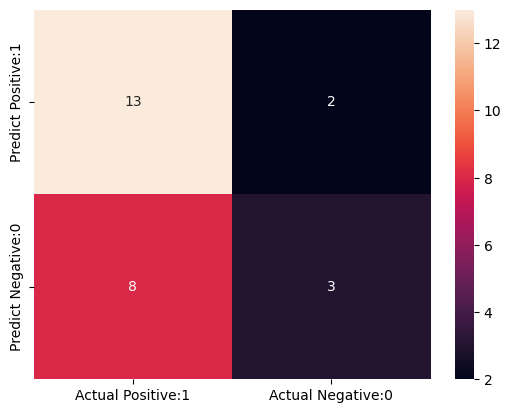

In [152]:
import seaborn as sns # for statistical data visualization
cm_matrix_gnb = pd.DataFrame(data=conf_m_gnb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_gnb, annot=True)

<Axes: >

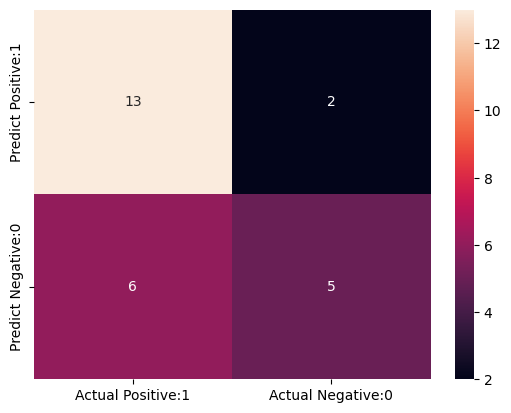

In [151]:
import seaborn as sns # for statistical data visualization
cm_matrix_logreg = pd.DataFrame(data=conf_m_logreg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_logreg, annot=True)

In [136]:
# Calculate the predicted probabilities for each class
y_pred_proba_gnb = model_gnb.predict_proba(X_test)

# Print the predicted probabilities
print("Predicted Probabilities:")
print(y_pred_proba_gnb)

Predicted Probabilities:
[[0.95871188 0.04128812]
 [0.95148635 0.04851365]
 [0.27586562 0.72413438]
 [0.84527753 0.15472247]
 [0.47883454 0.52116546]
 [0.62223572 0.37776428]
 [0.55459288 0.44540712]
 [0.97536361 0.02463639]
 [0.93087533 0.06912467]
 [0.93666447 0.06333553]
 [0.95544298 0.04455702]
 [0.85269826 0.14730174]
 [0.90057726 0.09942274]
 [0.90566539 0.09433461]
 [0.87633733 0.12366267]
 [0.68403603 0.31596397]
 [0.78773546 0.21226454]
 [0.70541357 0.29458643]
 [0.9547035  0.0452965 ]
 [0.27810984 0.72189016]
 [0.16222536 0.83777464]
 [0.78850362 0.21149638]
 [0.60060077 0.39939923]
 [0.9960557  0.0039443 ]
 [0.30001464 0.69998536]
 [0.95247635 0.04752365]]


In [137]:
# Calculate the predicted probabilities for each class
y_pred_proba_logreg = model_logreg.predict_proba(X_test)

# Print the predicted probabilities
print("Predicted Probabilities:")
print(y_pred_proba_logreg)

Predicted Probabilities:
[[0.94833183 0.05166817]
 [0.92540119 0.07459881]
 [0.20681138 0.79318862]
 [0.87343889 0.12656111]
 [0.39965468 0.60034532]
 [0.68392643 0.31607357]
 [0.63569999 0.36430001]
 [0.97619287 0.02380713]
 [0.9378283  0.0621717 ]
 [0.93519852 0.06480148]
 [0.93079661 0.06920339]
 [0.82126637 0.17873363]
 [0.91030968 0.08969032]
 [0.95950719 0.04049281]
 [0.89147121 0.10852879]
 [0.75511768 0.24488232]
 [0.80494088 0.19505912]
 [0.18092936 0.81907064]
 [0.89397915 0.10602085]
 [0.08718398 0.91281602]
 [0.25893776 0.74106224]
 [0.82917168 0.17082832]
 [0.09396341 0.90603659]
 [0.98539821 0.01460179]
 [0.35953001 0.64046999]
 [0.93562339 0.06437661]]


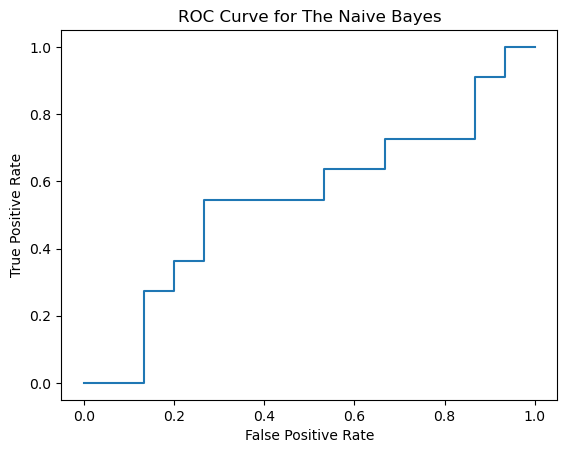

ROC AUC for The Naive Bayes: 0.5455


In [156]:
# Calculate the ROC AUC score for The Naive Bayes
y_pred_proba_gnb = model_gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score for The Naive Bayes
roc_auc_gnb = roc_auc_score(y_test, y_pred_proba_gnb)

# Plot the ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb)
plt.plot(fpr_gnb, tpr_gnb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for The Naive Bayes')
plt.show()


ROC_AUC_gnb = roc_auc_score(y_test, y_pred_proba_gnb)
print('ROC AUC for The Naive Bayes: {:.4f}'.format(ROC_AUC_gnb))

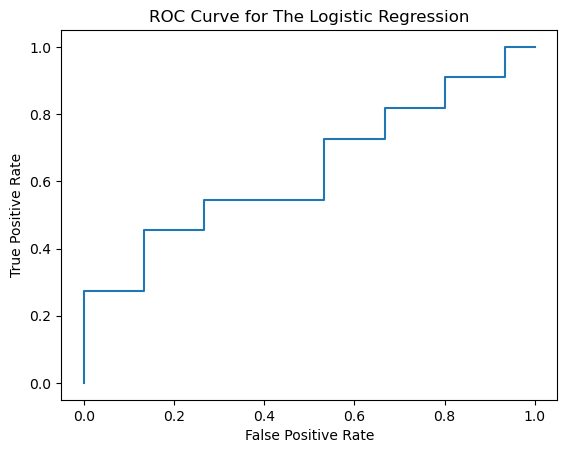

ROC AUC for The Logistic Regression: 0.6364


In [128]:
# Calculate the ROC AUC score for The Logistic Regression
y_pred_proba_logreg = model_logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score for The Logistic Regression
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

# Plot the ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
plt.plot(fpr_logreg, tpr_logreg)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for The Logistic Regression')
plt.show()


ROC_AUC_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print('ROC AUC for The Logistic Regression: {:.4f}'.format(ROC_AUC_logreg))

In [166]:
## Additional calculations for various cv values
cv_scores_gnb_3 = cross_val_score(model_gnb, X_train, y_train, cv=3, scoring='accuracy') #cv value equals to 3

print("Cross-Validation Scores:")
print(cv_scores_gnb_3)
print("Mean F1 Score for CV=5:", cv_scores.mean())


cv_scores_gnb_5 = cross_val_score(model_gnb, X_train, y_train, cv=5, scoring='accuracy') #cv value equals to 5

print("Cross-Validation Scores:")
print(cv_scores_gnb)
print("Mean F1 Score CV=10 :", cv_scores.mean())

cv_scores_logreg_3 = cross_val_score(model_logreg, X_train, y_train, cv=3, scoring='accuracy') #cv value equals to 3

print("Cross-Validation Scores:")
print(cv_scores_logreg_3)
print("Mean F1 Score for CV=5:", cv_scores.mean())


cv_scores_logreg_5 = cross_val_score(model_logreg, X_train, y_train, cv=5, scoring='accuracy') #cv value equals to 5

print("Cross-Validation Scores:")
print(cv_scores_logreg_10)
print("Mean F1 Score CV=10:", cv_scores.mean())


Cross-Validation Scores:
[0.77142857 0.73529412 0.76470588]
Mean F1 Score for CV=5: 0.7663636363636365
Cross-Validation Scores:
[0.75      0.7254902]
Mean F1 Score CV=10 : 0.7663636363636365
Cross-Validation Scores:
[0.77142857 0.70588235 0.73529412]
Mean F1 Score for CV=5: 0.7663636363636365
Cross-Validation Scores:
[0.80952381 0.71428571 0.71428571 0.8        0.65      ]
Mean F1 Score CV=10: 0.7663636363636365


# Pre-Processing and Data Analysis
Necessary libraries are imported: pandas, sklearn.naive_bayes, sklearn.model_selection, sklearn.metrics, and matplotlib.pyplot.
Reads the contents of a CSV file named "ecoli.csv" using pd.read_csv() function. The dataset is stored as a pandas DataFrame called ecoli. In order to see the missing values in the ecoli daatset the isnull().sum() function is used. The resulting count of missing values for each column is stored in the missing_values variable, which is 0. By being zero it is understood that the dataset is whole.

For better model performance features are scaled. By doing that it made the mean 0 and standard deviation 1.
In order to create test and train splits the feature matrix X and the target variable y from the ecoli extracted. The feature matrix X contains the features labeled 'X1', 'X2', 'X3', 'X4', and 'X5', and the target variable y contains the values from the 'C' column which is target value. The X and y are split into training and testing sets with a test size of 30% (specified by test_size=0.3) and a random seed of 42. The seperated training and testing sets are stored in X_train, X_test, y_train, and y_test variables.


# The Gaussian Naïve Bayes Model

Naive Bayes Model is a classification probability algorithm based on Bayes Theorem. It assumes that features are independent according to given the class label. The Naive Bayes model calculates the probability of each class given feature values and predicts the label with the highest probability.

Naive Bayes Model could be applied to two-class and multi-class problems. Gaussian Naive Bayes is generally used for binary classification problems.

Inputs
X: Feature matrix. A matrix includes the input features which are represented by the columns 'X1', 'X2', 'X3', 'X4', and 'X5'.
y: Target variable. The class labels corresponding to the input features are represented by the column 'C' which has 2 values: 0 and 1. 

Outputs
y_pred_gnb: Class labels predicted by the model.

The Gaussian Naive Bayes classifier is imported for classification and object is created. Later classifier fits into the training data. The trained classifier predicted the target values and according to the classification that the model made evaluation metrics have been calculated.

# The Logistic Regression

Logistic regression is a binary classification statistical model. It links the relationship between the input features and the target variable. The logistic regression model applies the logistic function of the input features, and it uses as a threshold to put the features into classes.

Inputs
X: Feature matrix. A matrix includes the input features which represented by the columns 'X1', 'X2', 'X3', 'X4', and 'X5'.
y: Target variable. The class labels corresponding to the input features are represented by the column 'C' which has 2 values: 0 and 1.

Outputs 
y_pred_logreg: Class labels predicted by the model.

Same as the Gaussian Naive Bayes Model, The Logistic Regression classifier is also imported, the object is created, trained, predicted and, according to the calculations evaluation metrics have been calculated.


# Comparison of Model Performance 

To compare the performance of the Naive Bayes and logistic regression models, several evaluation metrics are used in this code. These metrics are calculated for both the Naive Bayes and logistic regression models, and the results are compared in order to evaluate the models on the provided dataset. 

## Accuracy
The ratio of correct and true predicted values to the total number of values.
## Precision
The ratio of true positive predictions to the total number of positive predictions.
## Recall 
The ratio of true positive predictions to the total number of actual positives.
## F1 Score
The harmonic mean of precision and recall. Higher F1 score is better.
##  ROC AUC (Receiver Operating Characteristic Area Under the Curve)
It measures the success of the model by calculating the area under the ROC curve. A higher value indicates a better performance.


Accuracy For Naive Bayes: 0.6153846153846154
Precision For Naive Bayes: 0.6
Recall For Naive Bayes: 0.2727272727272727
F1 Score For Naive Bayes: 0.37499999999999994
ROC AUC for The Naive Bayes: 0.5455

Accuracy For Logistic Regression : 0.6923076923076923
Precision For Logistic Regression: 0.7142857142857143
Recall For Logistic Regression: 0.45454545454545453
F1 Score For Logistic Regression: 0.5555555555555556
ROC AUC for The Logistic Regression: 0.6364

## Confusion Matrix
The confusion matrix shows the type of error made by the models. Rows represent the actual classes, columns represent the predicted classes. For both of the models heat-map is created for visualisation.

True Positive (TP): Actually positive and predicted positive.
True Negative (TN): Actually negative and predicted negative.
False Positive (FP): Actually negative but predicted positive.
False Negative (FN): Actually positive but predicted negative.


### Confusion matrix for Naive Bayes

 [[13  2]
 [ 8  3]]

True Positives(TP) =  13
True Negatives(TN) =  3
False Positives(FP) =  2
False Negatives(FN) =  8

Matrix shows that 13+3=16 correct predictions and 8+2=10 incorrect predictions. 


### Confusion matrix for Logistic Regression  

 [[13  2]
 [ 6  5]]

True Positives(TP) =  13
True Negatives(TN) =  5
False Positives(FP) =  2
False Negatives(FN) =  6
Matrix shows that 13+5=18 correct predictions and 6+2=8 incorrect predictions.

When we compare the confusion matrix and evaluation metrices it shows that Logistic Regression is considerably better for given dataset with the whole metrices on the raw data. After cross-validation;

Naive Bayes Mean F1 Score: 0.7663636363636365

Logistic Regression Mean F1 Score: 0.7569758672699849 

is calculated. Additionally with various cross validaiton values it is seen both models becomes better at classifying. CV values 3 and 5 are calculated after ROC AUC calculation. 
For CV=2, it is seen that Naive Bayes is better than the Logistic Regression. Gaussian Naive Bayes works better with each fold and solves the underfit problem.



# Result
After model evaluation and comparing the prediction of probabilities are calculated with ROC AUC. According to the model comparison:
The Naive Bayes: 0.5455
The Logistic Regression Model: 0.6364

The Logistic Regression model has an accuracy of 0.692, the precision of 0.714, the recall of 0.455, the F1 score of 0.556 provides a balanced measure of precision and recall.
Comparing the two models, Logistic Regression generally performs better than the Gaussian Naive Bayes Model. The evaluation metrices shows that for the given dataset Logistic Regression made a better classification. Additionally, the confusion matrix shows that the Logistic Regression model has more true positives and true negatives, meanwhile the Naive Bayes model has more false positives and false negatives.